Full EDA + Feature Engineering + Visualization (Titanic Dataset)

In [1]:
# ----------------------------------
# DAY 7 MINI PROJECT: FULL EDA NOTEBOOK
# ----------------------------------

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

print("🚀 Day 7 Mini Project: Titanic EDA & Visualization 🚀\n")


🚀 Day 7 Mini Project: Titanic EDA & Visualization 🚀



Load Dataset

In [2]:
url = "https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv"
df = pd.read_csv(url)

print("Dataset Loaded Successfully!")
df.head()


Dataset Loaded Successfully!


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


Basic Exploration

In [3]:
df.shape


(891, 12)

In [4]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [5]:
df.describe()


,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [6]:
df.isnull().sum()


,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,177
SibSp,0
Parch,0
Ticket,0
Fare,0


Data Cleaning

In [7]:
# Fill missing Age with mean
df['Age'].fillna(df['Age'].mean(), inplace=True)

# Fill missing Embarked with mode
df['Embarked'].fillna(df['Embarked'].mode()[0], inplace=True)

# Drop Cabin (too many missing values)
df.drop(columns=['Cabin'], inplace=True)

print("Data Cleaning Completed!")
df.isnull().sum()


Data Cleaning Completed!


/tmp/ipython-input-1028781798.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Age'].fillna(df['Age'].mean(), inplace=True)
/tmp/ipython-input-1028781798.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try us

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,0
SibSp,0
Parch,0
Ticket,0
Fare,0


Feature Engineering (Day 5 Concepts)

In [8]:
# Family Size
df['FamilySize'] = df['SibSp'] + df['Parch'] + 1

# Family Type
def family_type(size):
    if size == 1:
        return "Solo"
    elif size <= 4:
        return "Small Family"
    else:
        return "Large Family"

df['FamilyType'] = df['FamilySize'].apply(family_type)

# Sex Encoding
df['Sex_num'] = df['Sex'].map({'male': 0, 'female': 1})

# Age Groups
df['AgeGroup'] = pd.cut(
    df['Age'],
    bins=[0, 12, 20, 40, 60, 100],
    labels=['Child', 'Teen', 'Adult', 'Middle-Aged', 'Senior']
)

print("Feature Engineering Completed!")
df.head()


Feature Engineering Completed!


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,FamilySize,FamilyType,Sex_num,AgeGroup
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,2,Small Family,0,Adult
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,2,Small Family,1,Adult
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,1,Solo,1,Adult
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,2,Small Family,1,Adult
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,1,Solo,0,Adult


EDA (Exploratory Data Analysis)

In [9]:
print("Survival Rate Overall:", df['Survived'].mean())


Survival Rate Overall: 0.3838383838383838


In [10]:
print("\nSurvival Rate by Gender:")
print(df.groupby('Sex')['Survived'].mean())



Survival Rate by Gender:
Sex
female    0.742038
male      0.188908
Name: Survived, dtype: float64


In [11]:
print("\nSurvival Rate by Passenger Class:")
print(df.groupby('Pclass')['Survived'].mean())



Survival Rate by Passenger Class:
Pclass
1    0.629630
2    0.472826
3    0.242363
Name: Survived, dtype: float64


In [12]:
print("\nSurvival Rate by Embarked Port:")
print(df.groupby('Embarked')['Survived'].mean())



Survival Rate by Embarked Port:
Embarked
C    0.553571
Q    0.389610
S    0.339009
Name: Survived, dtype: float64


In [13]:
print("\nAverage Fare per Class:")
print(df.groupby('Pclass')['Fare'].mean())



Average Fare per Class:
Pclass
1    84.154687
2    20.662183
3    13.675550
Name: Fare, dtype: float64


In [14]:
print("\nSurvival Rate by Family Type:")
print(df.groupby('FamilyType')['Survived'].mean())



Survival Rate by Family Type:
FamilyType
Large Family    0.161290
Small Family    0.578767
Solo            0.303538
Name: Survived, dtype: float64


Visualizations (Day 6 Combined)

Survival Count

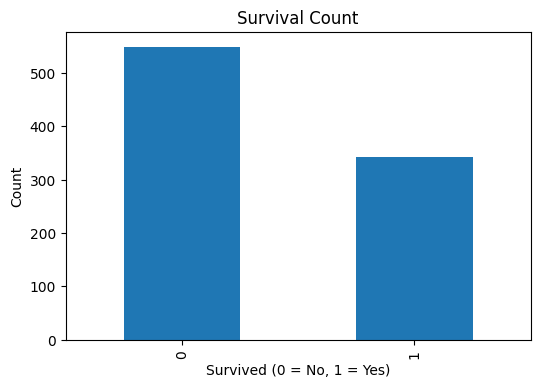

In [15]:
plt.figure(figsize=(6,4))
df['Survived'].value_counts().plot(kind='bar')
plt.title("Survival Count")
plt.xlabel("Survived (0 = No, 1 = Yes)")
plt.ylabel("Count")
plt.show()


Survival Rate by Embarked Port

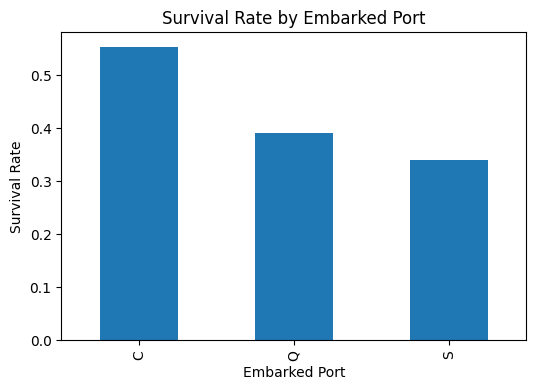

In [16]:
survival_by_embarked = df.groupby('Embarked')['Survived'].mean()

plt.figure(figsize=(6,4))
survival_by_embarked.plot(kind='bar')
plt.title("Survival Rate by Embarked Port")
plt.xlabel("Embarked Port")
plt.ylabel("Survival Rate")
plt.show()


Histogram of Fare

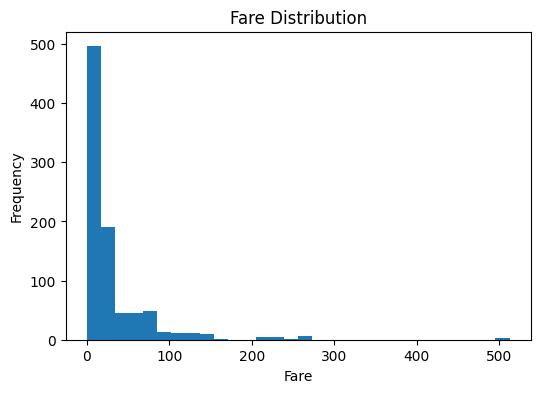

In [17]:
plt.figure(figsize=(6,4))
plt.hist(df['Fare'], bins=30)
plt.title("Fare Distribution")
plt.xlabel("Fare")
plt.ylabel("Frequency")
plt.show()


Boxplot: Age by Gender


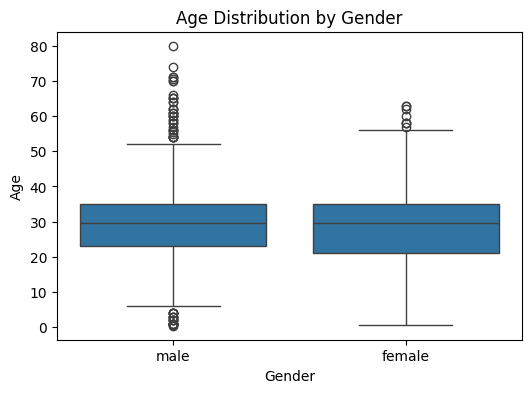

In [18]:
plt.figure(figsize=(6,4))
sns.boxplot(x='Sex', y='Age', data=df)
plt.title("Age Distribution by Gender")
plt.xlabel("Gender")
plt.ylabel("Age")
plt.show()


Survival Rate by Passenger Class

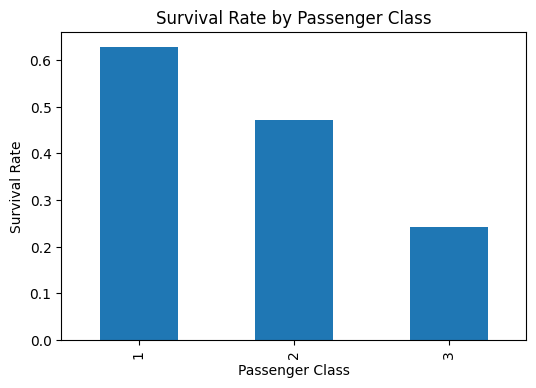

In [19]:
survival_by_class = df.groupby('Pclass')['Survived'].mean()

plt.figure(figsize=(6,4))
survival_by_class.plot(kind='bar')
plt.title("Survival Rate by Passenger Class")
plt.xlabel("Passenger Class")
plt.ylabel("Survival Rate")
plt.show()


Heatmap: Selected Features

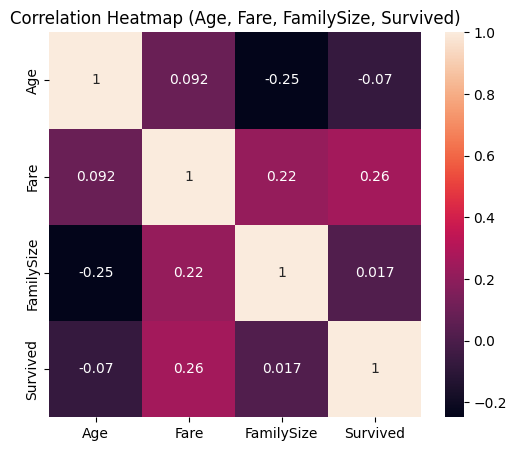

In [20]:
selected = df[['Age', 'Fare', 'FamilySize', 'Survived']]
corr = selected.corr()

plt.figure(figsize=(6,5))
sns.heatmap(corr, annot=True)
plt.title("Correlation Heatmap (Age, Fare, FamilySize, Survived)")
plt.show()


Advanced Pivot Tables

In [21]:
# Survival by Sex and Class
pivot1 = pd.pivot_table(df, values='Survived', index='Sex', columns='Pclass', aggfunc='mean')
print("Survival Rate by Sex & Class:")
print(pivot1)


Survival Rate by Sex & Class:
Pclass         1         2         3
Sex                                 
female  0.968085  0.921053  0.500000
male    0.368852  0.157407  0.135447


In [22]:
# Survival by AgeGroup and Sex
pivot2 = pd.pivot_table(df, values='Survived', index='AgeGroup', columns='Sex', aggfunc='mean')
print("\nSurvival Rate by AgeGroup & Sex:")
print(pivot2)



Survival Rate by AgeGroup & Sex:
Sex            female      male
AgeGroup                       
Child        0.593750  0.567568
Teen         0.755556  0.123077
Adult        0.756614  0.166220
Middle-Aged  0.755556  0.192771
Senior       1.000000  0.105263


/tmp/ipython-input-3989204315.py:2: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  pivot2 = pd.pivot_table(df, values='Survived', index='AgeGroup', columns='Sex', aggfunc='mean')


Save Final Clean Dataset

In [23]:
df.to_csv("titanic_day7_eda_project.csv", index=False)
print("Final dataset saved as titanic_day7_eda_project.csv")


Final dataset saved as titanic_day7_eda_project.csv
